In [80]:
from src import database as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

df0 = pd.DataFrame(list(db.get_collection().find()))
del df0['_id']
df0.head()

,id,nickname,start_date,end_date,real_name,country,team,age,rating,dpr,kast,impact,adr,kpr,total_kills,headshot_percentage,total_deaths,kd
0,19869,try,2021-08-01,2021-08-31,Santino Rigal,Argentina,9z,16,1.42,0.51,79.9,1.40,86.9,0.88,689,31.3,395,1.74
1,16647,Bwills,2021-08-01,2021-08-31,Brendan Williams,United States,Triumph,20,1.34,0.63,77.3,1.42,91.5,0.87,325,42.8,235,1.38
2,10722,gas,2021-08-01,2021-08-31,Yi Ding,China,Wings Up,25,1.30,0.68,76.8,1.34,89.3,0.86,340,60.6,269,1.26
3,20127,w0nderful,2021-08-01,2021-08-31,Igor Zhdanov,Ukraine,Trasko,16,1.36,0.51,80.3,1.28,82.6,0.84,625,33.8,385,1.62
4,16546,cynic,2021-08-01,2021-08-31,David Polster,United States,Party Astronauts,21,1.28,0.59,77.6,1.30,83.4,0.80,301,26.2,222,1.36


# Встановити числові параметри, за якими будувати регресію, та обрати тип регресії

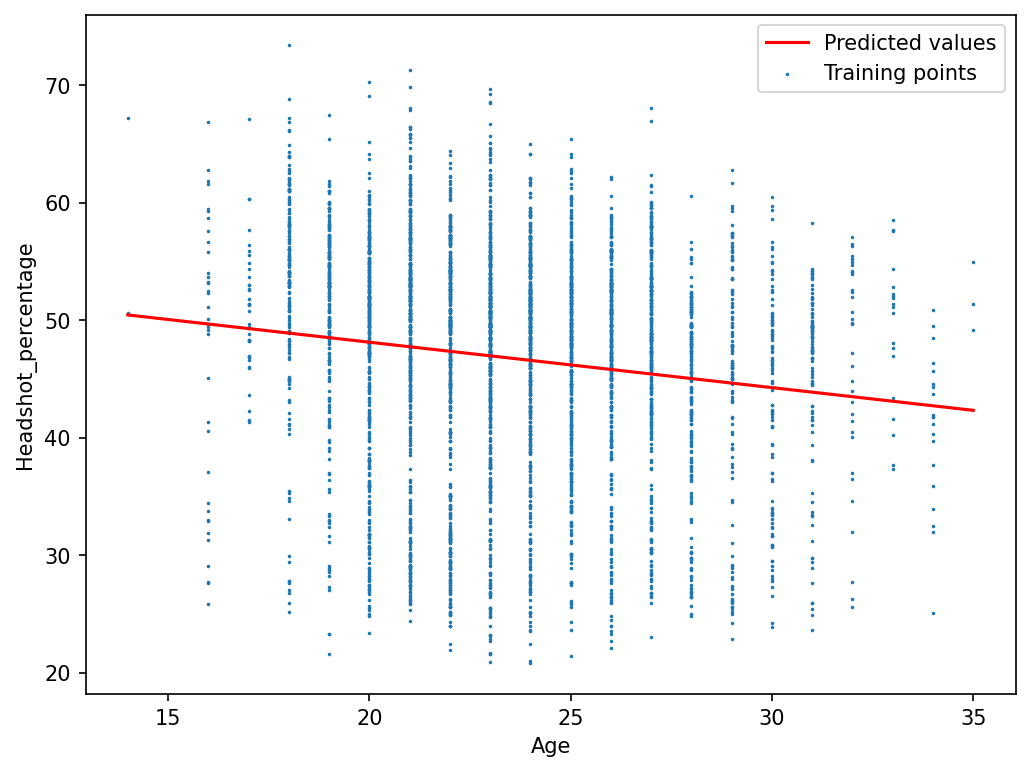

In [83]:
x_parameter = 'age'
y_parameter = 'headshot_percentage'
regression_type = 'linear' # linaer or polynomial

df = df0
total_parameters = ('total_kills', 'total_deaths')
if x_parameter in total_parameters or y_parameter in total_parameters:
    df = df.query('start_date != ""')

x_label = x_parameter.capitalize()
y_label = y_parameter.capitalize()
title = f"{regression_type.capitalize()}_regression_for_{x_label}_with_{y_label}"
indexes = {
    "age": 7,
    "rating": 8,
    "dpr": 9,
    "kast": 10,
    "impact":11,
    "adr": 12,
    "kpr": 13,
    "total_kills": 14,
    "headshot_percentage": 15,
    "total_deaths": 16,
    "kd": 17
}

x = df.iloc[:, indexes[x_parameter]].values.reshape(-1, 1)  
y = df.iloc[:, indexes[y_parameter]].values.reshape(-1, 1)  

models = {
    'linear': LinearRegression().fit(x, y),
    'polynomial': make_pipeline(PolynomialFeatures(3), Ridge()).fit(x, y)
}

plt.figure(figsize=(8, 6), dpi=150)
plt.xlabel(x_label)
plt.ylabel(y_label)

# training points
plt.scatter(x, y, s=0.5, label='Training points')
# predict values
model = models[regression_type]
x_plot = np.linspace(min(x), max(x)).reshape(-1, 1)
y_pred = model.predict(x_plot)
plt.plot(x_plot, y_pred, color='red', label='Predicted values')

plt.legend(loc='upper right')
plt.draw()
plt.show()

# Знайти топ 10 гравців за певним параметром

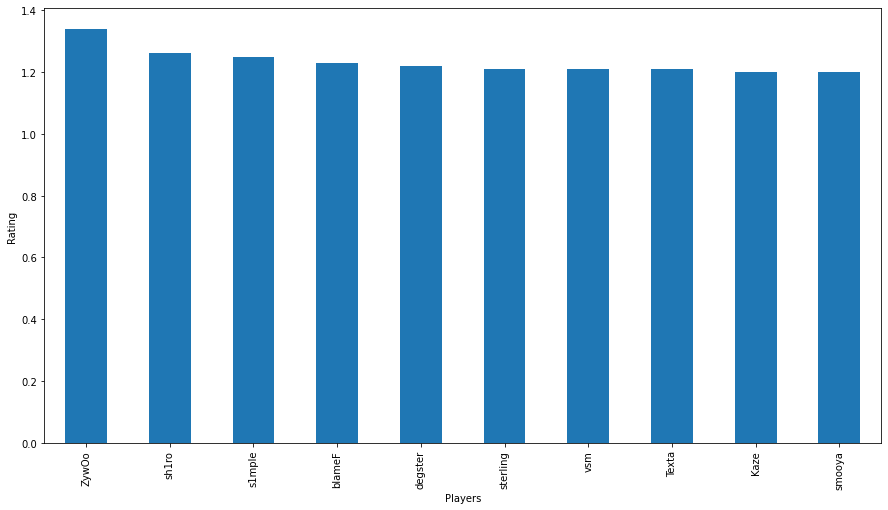

In [84]:
parameter = 'rating'

df = df0[df0.start_date == ""]

if parameter == 'dpr':
    df = df.nsmallest(10, parameter, keep='all')
else:
    df = df.nlargest(10, parameter, keep='all')
    

df.plot(kind='bar', x ="nickname", y=parameter, figsize=(15, 8), legend=False)
plt.xlabel("Players")
plt.ylabel(parameter.capitalize())

plt.draw()
plt.show()

# Динаміка гравця за параметром

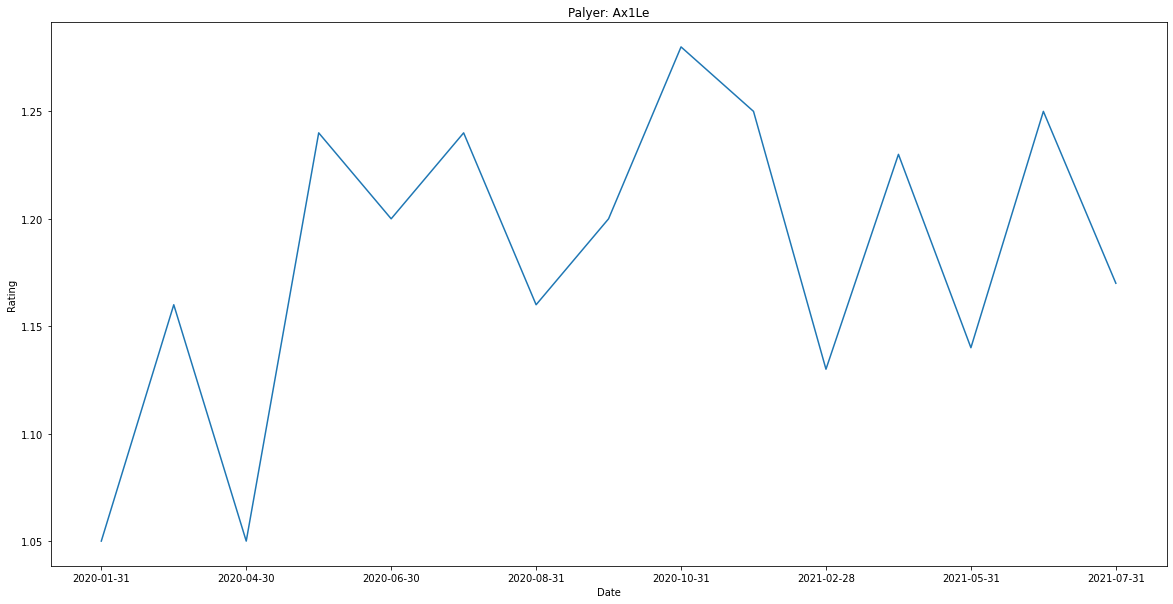

In [87]:
parameter = 'rating'
nickname = 'Ax1Le'

df = df0[(df0.nickname == nickname) & (df0.start_date != "")]
df = df.sort_values(by="start_date")
df.head(20)
df.plot(kind='line', x='end_date', y=parameter, figsize=(20, 10), legend=False, title=f"Palyer: {nickname}")
plt.xlabel("Date")
plt.ylabel(parameter.capitalize())

plt.draw()
plt.show()